In [282]:
import numpy as np
from IPython.display import Image

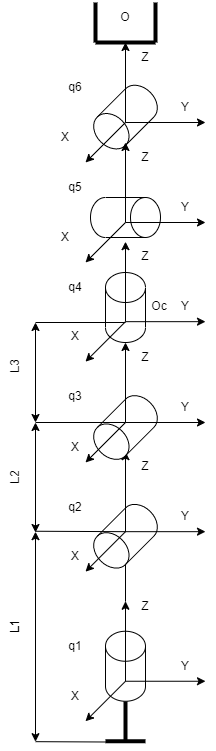

In [283]:
Image(filename='PUMA.png')
#Simple graph of my model

In [284]:
#Matrices
def Rx(q):
    mtx = np.identity(4)
    mtx[1, 1] = mtx[2, 2] = np.cos(q)
    mtx[2, 1],  mtx[1, 2] = np.sin(q), -np.sin(q)
    return mtx

def Ry(q):
    mtx = np.identity(4)
    mtx[0, 0] = mtx[2, 2] = np.cos(q)
    mtx[0, 2],  mtx[2, 0] = np.sin(q), -np.sin(q)
    return mtx

def Rz(q):
    mtx = np.identity(4)
    mtx[0, 0] = mtx[1, 1] = np.cos(q)
    mtx[1, 0],  mtx[0, 1] = np.sin(q), -np.sin(q)
    return mtx
def Tx(x):
    mtx = np.identity(4)
    mtx[0,3] = x
    return mtx
def Ty(y):
    mtx = np.identity(4)
    mtx[1,3] = y
    return mtx
def Tz(z):
    mtx = np.identity(4)
    mtx[2,3] = z
    return mtx
def Ttool(*args):
    x,y,z = args
    mtx = np.identity(4)
    mtx[0,3],mtx[1,3],mtx[2,3] = x,y,z
    return mtx

Forward Kinematics

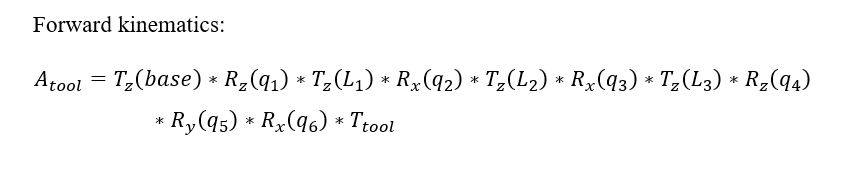

In [285]:
Image(filename='Forward Kinematics.png')

In [286]:
def ForwardKinematics(*args):
    q1,q2,q3,q4,q5,q6,L1,L2,L3,d = args
    Tbase = np.identity(4)
    return Tbase @ Rz(q1) @ Tz(L1) @ Rx(q2) @ Tz(L2) @ Rx(q3) @ Tz(L3) @ Rz(q4) @ Ry(q5) @ Rx(q6) @ Ttool(*d)

In [287]:
#Solution
#q1,q2,q3,q4,q5,q6,L1,L2,L3,Ttool = [1,2,3,4,5,6,20,10,30,(0,0,1)]
ForwardKinematics(*[-0.1,0,-1.57,0,0,0,1,1,1,(0,0,1)])
#ForwardKinematics(*[1,2,3,1,2,3,5,7,10,(0,0,1)])

array([[ 9.95004165e-01,  7.95000163e-05,  9.98333850e-02,
         1.99666770e-01],
       [-9.98334166e-02,  7.92348394e-04,  9.95003850e-01,
         1.99000770e+00],
       [ 0.00000000e+00, -9.99999683e-01,  7.96326711e-04,
         2.00159265e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Inverse Kinematics

In [289]:
#Getting started with position and rotation
FK = ForwardKinematics(*[0.1,np.pi/7,1.57,0,0,0,1,1,1,(0,0,1)])
#Extracting matrices
O = FK[0:3,-1]
R = FK[0:3,0:3]
d = np.array([0,0,1])
L1,L2,L3 = 1,1,1

In [290]:
#Finding coordinates of the end of manipulator = Oc
Oc = O - R @ d
Oc

array([ 0.13329736, -1.32852741,  1.46780273])

In [291]:
q1 = np.pi/2 + np.arctan2(Oc[1],Oc[0]) #arctan between x and y axis
q1 #First angle is correct and corresponds to FK

0.09999999999999987

In [292]:
z = Oc[2]-L1 #Transition from origin of coordinates
xy = np.sqrt(Oc[0]**2+Oc[1]**2) #Transition from origin of coordinates
L = np.sqrt(xy**2+z**2) #Strait line from origin
q3 = np.arccos((L2**2+L3**2-L**2)/(2*L2*L3))
print(np.pi - q3, q3 - np.pi)
q3 = np.pi - q3

1.5699999999999998 -1.5699999999999998


In [293]:
alpha = np.arctan2(xy,z)
beta = np.arccos((L2**2+L**2-L3**2)/(2*L2*L))
q2 = alpha - beta
print(alpha-beta, alpha+beta)

0.4487989505128277 2.018798950512828


In [318]:
R_03 = Rz(q1) @ Rx(q2) @ Rx(q3)
R_03 = R_03[0:3,0:3]
R_03

array([[ 0.99500417,  0.04324446,  0.08998127],
       [ 0.09983342, -0.43100211, -0.89681128],
       [ 0.        ,  0.9013141 , -0.43316614]])

In [319]:
R_03T = R_03.T
R_03T

array([[ 0.99500417,  0.09983342,  0.        ],
       [ 0.04324446, -0.43100211,  0.9013141 ],
       [ 0.08998127, -0.89681128, -0.43316614]])

In [322]:
R_46 = R_03T @ R
R_46

array([[ 1.00000000e+00,  6.59819576e-17,  1.34690524e-16],
       [-5.76786718e-17,  1.00000000e+00, -3.43360833e-17],
       [-1.28544920e-16,  7.12080510e-17,  1.00000000e+00]])

In [323]:
q5 = np.arcsin(-R_46[2,0])
q5

1.2854492033285263e-16

In [328]:
q6 = np.arcsin(R_46[2,1]/np.cos(q5))
q6

7.120805097842318e-17

In [329]:
q4 = np.arcsin(R_46[1,0]/np.cos(q5))
q4

-5.767867180816549e-17